<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-Data" data-toc-modified-id="Importing-Libraries-and-Data-1">Importing Libraries and Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explain-choice-of-data-and-points" data-toc-modified-id="Explain-choice-of-data-and-points-1.0.1">Explain choice of data and points</a></span></li></ul></li></ul></li><li><span><a href="#Data-wrangling" data-toc-modified-id="Data-wrangling-2">Data wrangling</a></span></li><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-3">Time-Series Analysis</a></span><ul class="toc-item"><li><span><a href="#Decomposition" data-toc-modified-id="Decomposition-3.1">Decomposition</a></span><ul class="toc-item"><li><span><a href="#Discuss-results-of-decomposition" data-toc-modified-id="Discuss-results-of-decomposition-3.1.1">Discuss results of decomposition</a></span></li></ul></li><li><span><a href="#Testing-for-stationarity" data-toc-modified-id="Testing-for-stationarity-3.2">Testing for stationarity</a></span><ul class="toc-item"><li><span><a href="#Interpret-results-of-Dickey-Fuller-and-Autocorrelation-tests" data-toc-modified-id="Interpret-results-of-Dickey-Fuller-and-Autocorrelation-tests-3.2.1">Interpret results of Dickey-Fuller and Autocorrelation tests</a></span></li></ul></li><li><span><a href="#Stationarizing-the-GDP-(EU)-data" data-toc-modified-id="Stationarizing-the-GDP-(EU)-data-3.3">Stationarizing the GDP (EU) data</a></span><ul class="toc-item"><li><span><a href="#Interpret-results-of-Dickey-Fuller-and-Autocorrelation-tests-after-Differencing" data-toc-modified-id="Interpret-results-of-Dickey-Fuller-and-Autocorrelation-tests-after-Differencing-3.3.1">Interpret results of Dickey-Fuller and Autocorrelation tests after Differencing</a></span></li></ul></li></ul></li></ul></div>

# Importing Libraries and Data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [11]:
# display graphs within the notebook
%matplotlib inline

In [12]:
# define a path
path = r'/Users/profkdfischer/World Happiness Report Analysis'

In [13]:
# import the IMF dataset on annual GDP for Europe from 1980 - 2022
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'GDP_EU.csv'))

### Explain choice of data and points

Data Source: 
The IMF data on global GDP levels, in current US dollar prices -
https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD

Note: I took the data for the "EU" region only for this exercise and I removed the projected values, from 2023 onwards. I kept everything else, from 1980-2022. No other subsets were necessary.

Note: I chose this dataset because my "World Happiness Report" dataset only has 9 years and 9 points is not enough to analyze a time series, apparently 50 points is the bare minimum. However, this dataset is thematically related to WHR because it covers GDP.

In [14]:
pd.set_option('display.precision', 2)

In [15]:
df.head()

,Date,Value (EU)
0,1980,8551.64
1,1981,7525.55
2,1982,7271.92
3,1983,7090.12
4,1984,6811.60


In [16]:
df.shape

(43, 2)

# Data wrangling

In [17]:
# set the year column as the index
df.set_index('Date', inplace = True)

In [18]:
df.head()

,Value (EU)
Date,
1980,8551.64
1981,7525.55
1982,7271.92
1983,7090.12
1984,6811.60


In [19]:
# set the index to pandas datetime object
df.index = pd.to_datetime(df.index, format='%Y')

In [20]:
df.head()

,Value (EU)
Date,
1980-01-01,8551.64
1981-01-01,7525.55
1982-01-01,7271.92
1983-01-01,7090.12
1984-01-01,6811.60


In [23]:
# Check for missing values
df.isnull().sum() 

Value (EU)    0
dtype: int64

In [24]:
# Check for duplicates
dups = df.duplicated()
dups.sum()

0

Comment: no missing values or duplicates.

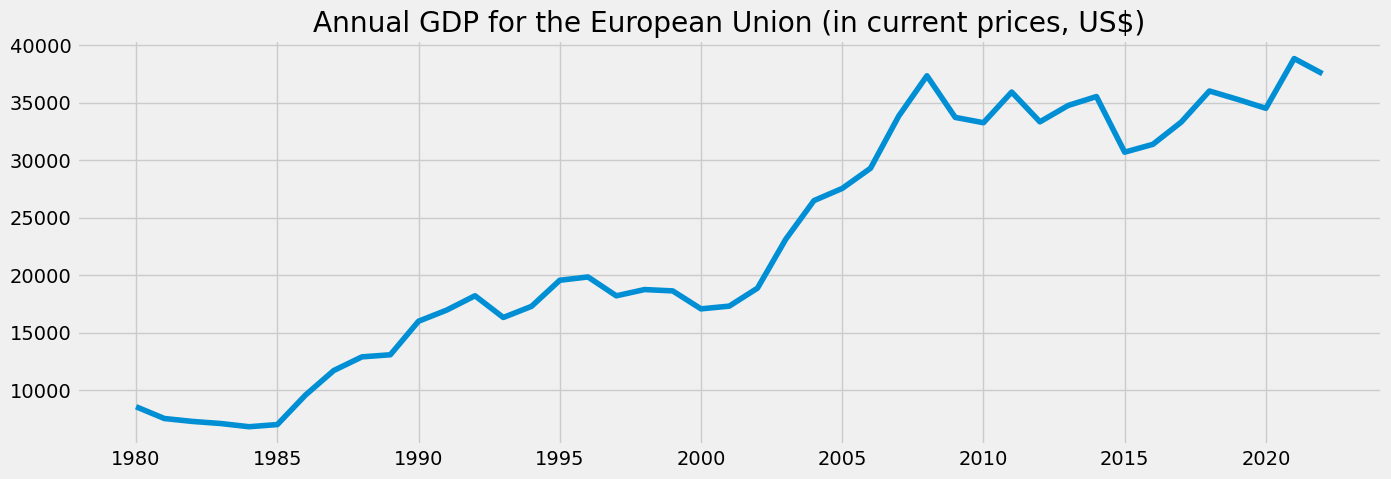

In [43]:
# Plot the data set
plt.figure(figsize=(15,5), dpi=100)
plt.title('Annual GDP for the European Union (in current prices, US$)')
plt.plot(df)

# Time-Series Analysis

## Decomposition

In [25]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [26]:
# Define a fixed size for all special charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

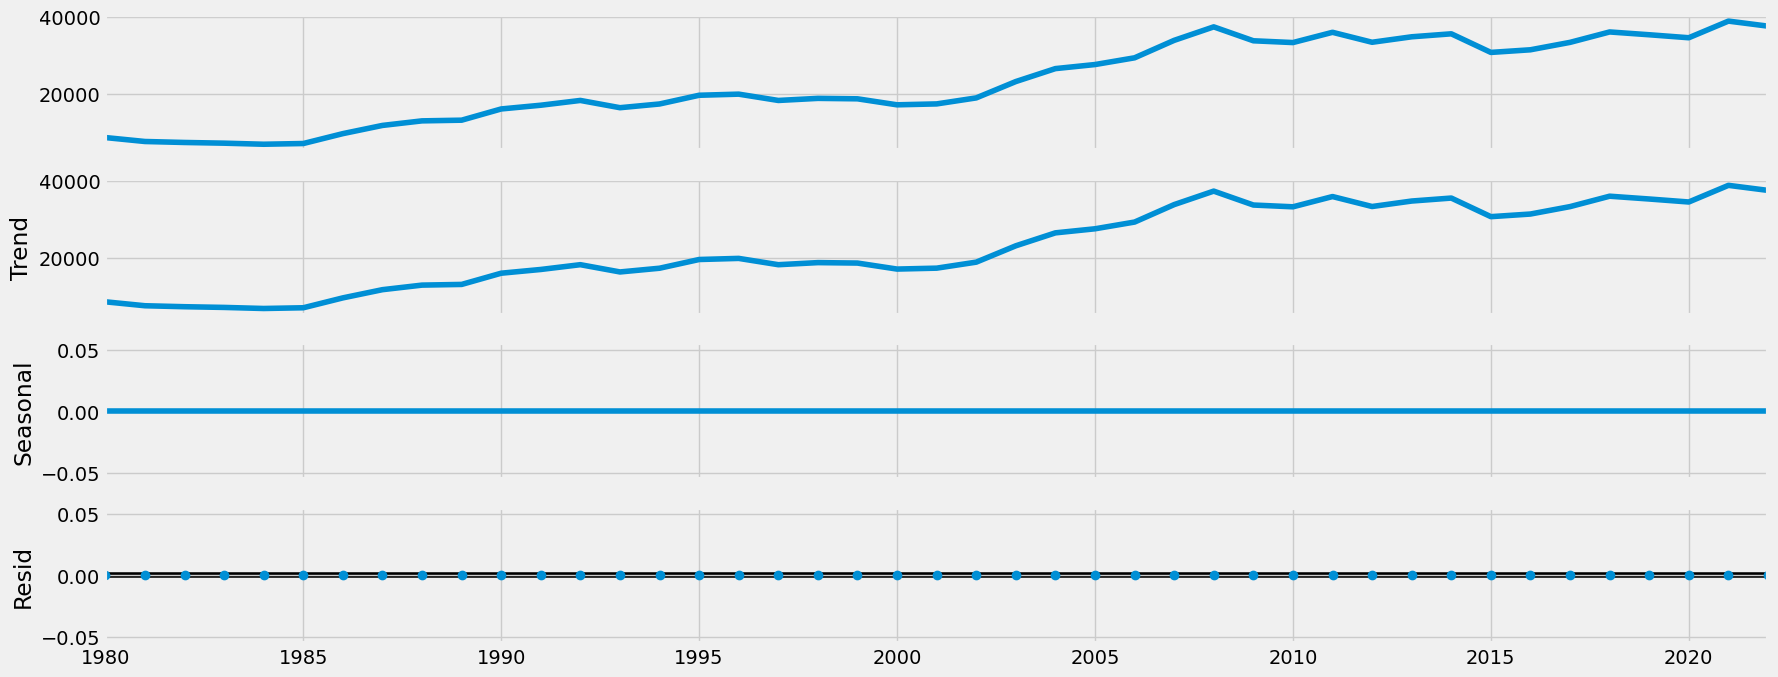

In [27]:
# Plot the separate components
decomposition.plot()
plt.show()

###  Discuss results of decomposition

The trend line shows a slow but steady rise over time in the annual EU GDP, with only minor fluctuations. There is no seasonality at all, but the data is collected annually so unless there is some long term 5- or 10-year cycle, there is probably no seasonality to this kind of data. The residuals line that shows noise or anything else not shown in trend and seasonality lines is flat, meaning that the decomposition worked well.

## Testing for stationarity

In [29]:
# Run the augmented Dickey-Fuller test (ADF) and print out the results 

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Value (EU)'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.61
p-value                         0.87
Number of Lags Used             0.00
Number of Observations Used    42.00
Critical Value (1%)            -3.60
Critical Value (5%)            -2.93
Critical Value (10%)           -2.60
dtype: float64


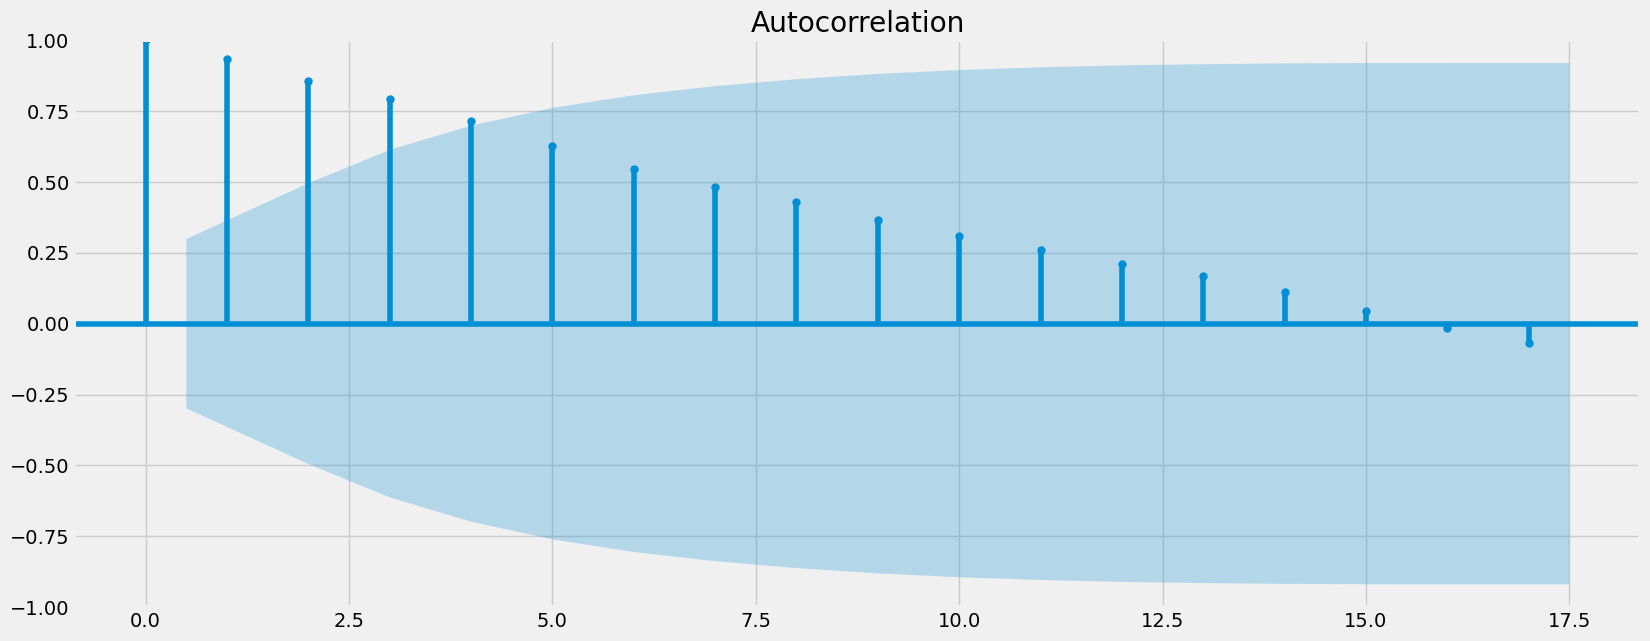

In [31]:
# Run the autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

### Interpret results of Dickey-Fuller and Autocorrelation tests

Comment: The results of the ADF test show that the series is NOT stationary. The test statistic is not lower than the critical values and the p-value is not under 0.05, meaning that the null hypothesis was not disproven - the series has a unit root and is non-stationary. It's also obvious that the data is non-stationary when looking at the original line, because it has a clear upwards trend, but the ADF test confirms it.

Comment: The autocorrelation test shows that there are 4 lags beyond the confidence interval, therefore, the series does show autocorrelation.

## Stationarizing the GDP (EU) data

In [33]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = df - df.shift(1) 

In [35]:
# check for missing values
data_diff.isnull().sum() 

Value (EU)    1
dtype: int64

In [36]:
# Remove the missing values created by the differencing in order to run the ADF test
data_diff.dropna(inplace = True) 

In [37]:
data_diff.head()

,Value (EU)
Date,
1981-01-01,-1026.09
1982-01-01,-253.62
1983-01-01,-181.81
1984-01-01,-278.51
1985-01-01,188.41


In [38]:
data_diff.columns

Index(['Value (EU)'], dtype='object')

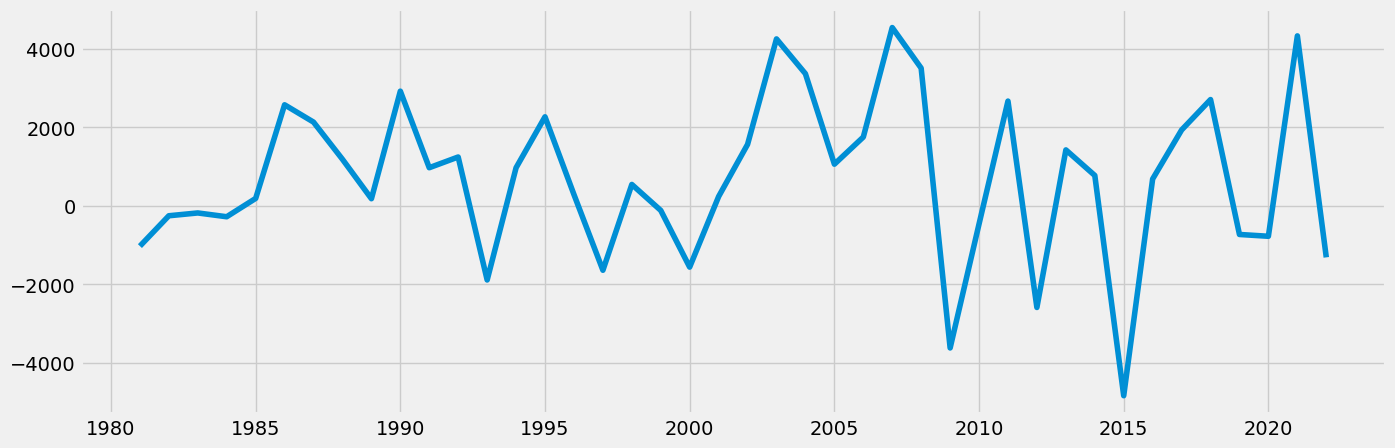

In [39]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

Comment: Whoa, it looks so much more interesting now.

In [40]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.09
p-value                         0.03
Number of Lags Used             2.00
Number of Observations Used    39.00
Critical Value (1%)            -3.61
Critical Value (5%)            -2.94
Critical Value (10%)           -2.61
dtype: float64


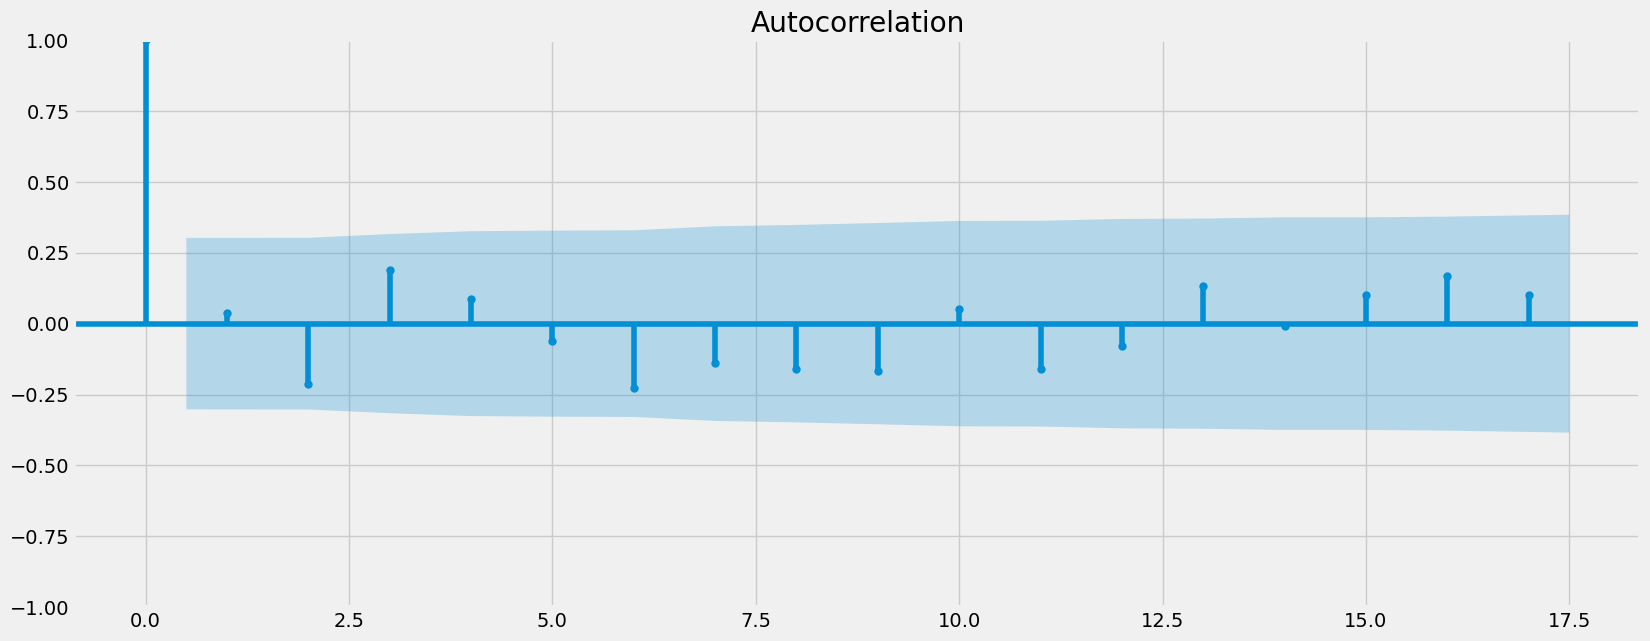

In [41]:
plot_acf(data_diff)
plt.show()

### Interpret results of Dickey-Fuller and Autocorrelation tests after Differencing

Comment: The time series now passes the Dickey-Fuller test, with a test statistic of -3.09, which is lower than all 3 critical values, and a statistically significant p-value of 0.03, meaning that the null hypothesis that there is a unit root is disproved. Thus, the time series is now stationary and ready for forecasting.

Comment: the autocorrelation is mostly gone, as there is now only 1 lag outside of the confidence interval, and we can interpret that as an indication of good stationarity.